In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
base_dir = os.getcwd()
csv_path = os.path.join(base_dir, "medical_examination.csv")
df = pd.read_csv(csv_path)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)
print(df['overweight'])

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64


In [5]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
print(df['cholesterol'])

df['gluc'] = (df['gluc'] > 1).astype(int)
print(df['gluc'])

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int64


In [6]:
df_cat = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)

print(df_cat.head())

   cardio     variable  value
0       0  cholesterol      0
1       1  cholesterol      1
2       1  cholesterol      1
3       1  cholesterol      0
4       0  cholesterol      0


In [7]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
print(df_cat)

    cardio     variable  value  total
0        0       active      0   6378
1        0       active      1  28643
2        0         alco      0  33080
3        0         alco      1   1941
4        0  cholesterol      0  29330
5        0  cholesterol      1   5691
6        0         gluc      0  30894
7        0         gluc      1   4127
8        0   overweight      0  15915
9        0   overweight      1  19106
10       0        smoke      0  31781
11       0        smoke      1   3240
12       1       active      0   7361
13       1       active      1  27618
14       1         alco      0  33156
15       1         alco      1   1823
16       1  cholesterol      0  23055
17       1  cholesterol      1  11924
18       1         gluc      0  28585
19       1         gluc      1   6394
20       1   overweight      0  10539
21       1   overweight      1  24440
22       1        smoke      0  32050
23       1        smoke      1   2929


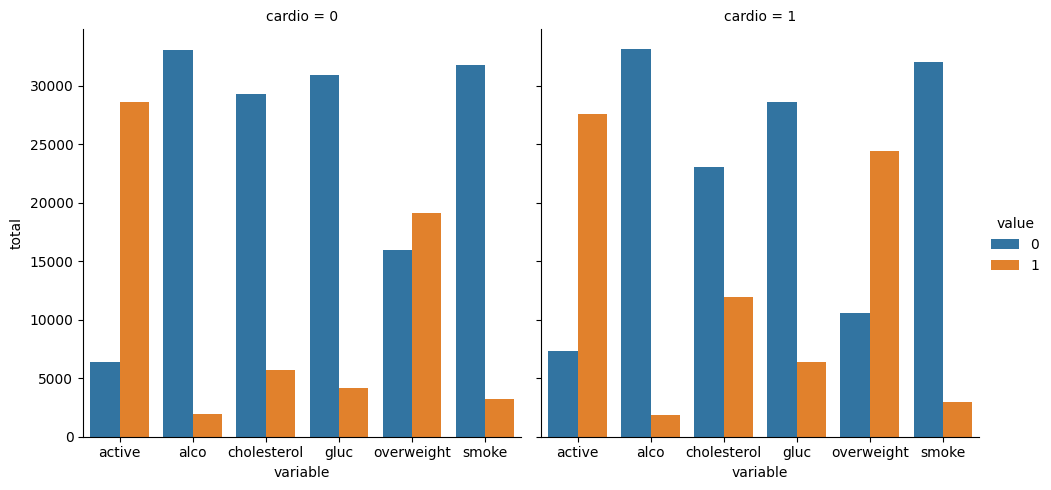

None


In [9]:
sns.catplot(
    x="variable", 
    y="total", 
    hue="value", 
    col="cardio", 
    kind="bar", 
    data=df_cat
)

fig = plt.show()
print(fig)

In [ ]:
# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    )


    # 6
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    

    # 7
    sns.catplot(
    x="variable", 
    y="total", 
    hue="value", 
    col="cardio", 
    kind="bar", 
    data=df_cat
    )
    
    # 8
    fig = plt.show()


    # 9
    fig.savefig('catplot.png')
    return fig

In [ ]:
df_heat = df[
(df['ap_lo'] <= df['ap_hi']) &
(df['height'] >= df['height'].quantile(0.025)) &
(df['height'] <= df['height'].quantile(0.975)) &
(df['weight'] >= df['weight'].quantile(0.025)) &
(df['weight'] <= df['weight'].quantile(0.975))
]

print(df_heat)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69993  99991  19699    1     172    70.0    130     90            0     0   
69994  99992  21074    1     165    80.0    150     80            0     0   
69995  99993  19240    2     168    76.0    120     80            0     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

In [11]:
corr = df_heat.corr(numeric_only=True)
print(corr)

                   id       age       sex    height    weight     ap_hi  \
id           1.000000  0.002507  0.003426  0.000326  0.000149  0.003492   
age          0.002507  1.000000 -0.018132 -0.076932  0.070168  0.018689   
sex          0.003426 -0.018132  1.000000  0.505785  0.129979  0.005063   
height       0.000326 -0.076932  0.505785  1.000000  0.251503  0.004586   
weight       0.000149  0.070168  0.129979  0.251503  1.000000  0.027030   
ap_hi        0.003492  0.018689  0.005063  0.004586  0.027030  1.000000   
ap_lo        0.000484  0.153508  0.059947  0.017922  0.227922  0.072803   
cholesterol  0.003719  0.129996 -0.037605 -0.063522  0.135981  0.022807   
gluc         0.002289  0.086990 -0.021357 -0.030469  0.107072  0.011111   
smoke       -0.002732 -0.044371  0.337436  0.187830  0.056533 -0.001928   
alco        -0.000708 -0.026970  0.168637  0.089785  0.059917  0.000769   
active       0.005891 -0.011445  0.007864 -0.005661 -0.014430 -0.000222   
cardio       0.003900  0.

In [12]:
mask = np.triu(np.ones_like(corr, dtype=bool))

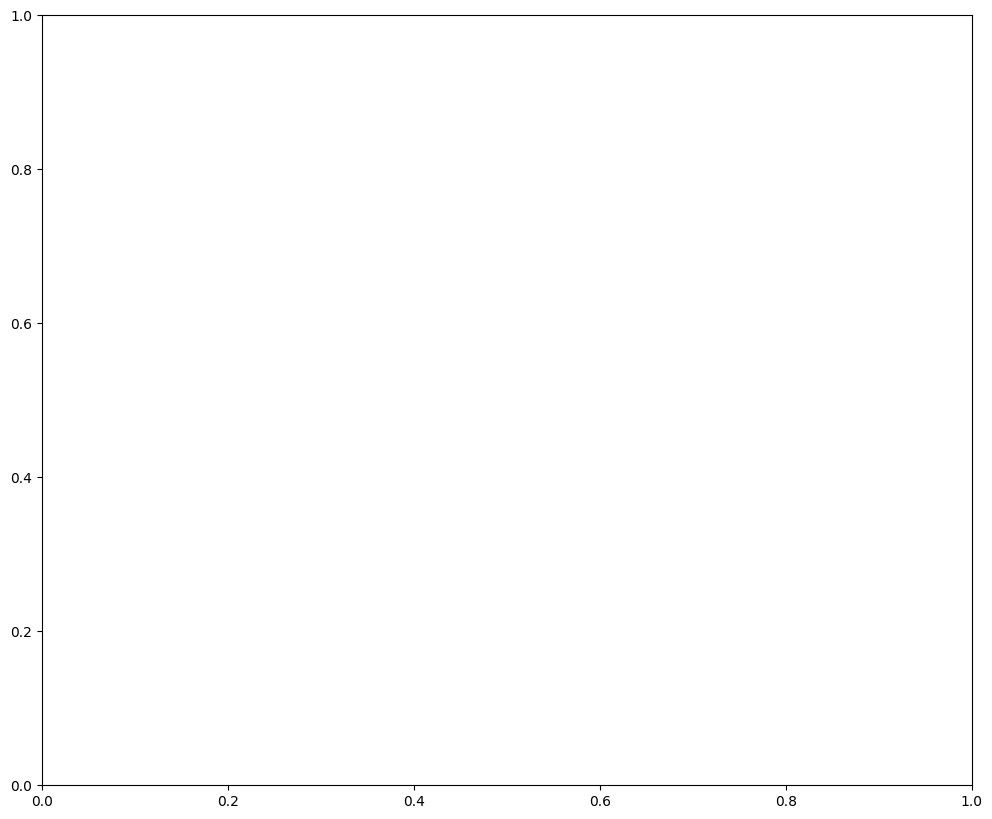

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))

In [ ]:
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".1f",
    center=0,
    vmin=-0.1, vmax=0.25,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.5},
    ax=ax
)

In [ ]:
# 10
def draw_heat_map():
    # 11
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12
    corr = df_heat.corr(numeric_only=True)

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14
    fig, ax = plt.subplots(figsize=(12, 10))

    # 15
    sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".1f",
    center=0,
    vmin=-0.1, vmax=0.25,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.5},
    ax=ax
    )


    # 16
    fig.savefig('heatmap.png')
    return fig